# 0. Load Libraries

In [40]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits import mplot3d


# 1. Import Data

In [7]:
colombia_og = pd.read_csv("/content/drive/MyDrive/Clases/data/Colombia/Casos_positivos_de_COVID-19_en_Colombia.csv")


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (14,17,19,20,22) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
colombia_og.iloc[0:10,:]

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicación del caso,Estado,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,6/3/2020 0:00:00,1,2/3/2020 0:00:00,11,BOGOTA,11001,BOGOTA,19,1,F,Importado,Casa,Leve,380.0,ITALIA,Recuperado,27/2/2020 0:00:00,NaN,6/3/2020 0:00:00,13/3/2020 0:00:00,PCR,6.0,NaN
1,9/3/2020 0:00:00,2,6/3/2020 0:00:00,76,VALLE,76111,BUGA,34,1,M,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,4/3/2020 0:00:00,NaN,9/3/2020 0:00:00,19/3/2020 0:00:00,PCR,5.0,NaN
2,9/3/2020 0:00:00,3,7/3/2020 0:00:00,5,ANTIOQUIA,5001,MEDELLIN,50,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,29/2/2020 0:00:00,NaN,9/3/2020 0:00:00,15/3/2020 0:00:00,PCR,6.0,NaN
3,11/3/2020 0:00:00,4,9/3/2020 0:00:00,5,ANTIOQUIA,5001,MEDELLIN,55,1,M,Relacionado,Casa,Leve,NaN,NaN,Recuperado,6/3/2020 0:00:00,NaN,11/3/2020 0:00:00,26/3/2020 0:00:00,PCR,6.0,NaN
4,11/3/2020 0:00:00,5,9/3/2020 0:00:00,5,ANTIOQUIA,5001,MEDELLIN,25,1,M,Relacionado,Casa,Leve,NaN,NaN,Recuperado,8/3/2020 0:00:00,NaN,11/3/2020 0:00:00,23/3/2020 0:00:00,PCR,6.0,NaN
5,11/3/2020 0:00:00,6,10/3/2020 0:00:00,5,ANTIOQUIA,5360,ITAGUI,27,1,F,Relacionado,Casa,Leve,NaN,NaN,Recuperado,6/3/2020 0:00:00,NaN,11/3/2020 0:00:00,26/3/2020 0:00:00,PCR,6.0,NaN
6,11/3/2020 0:00:00,7,8/3/2020 0:00:00,13001,CARTAGENA,13001,CARTAGENA,85,1,F,Importado,Casa,Leve,840.0,ESTADOS UNIDOS DE AMÉRICA,Recuperado,2/3/2020 0:00:00,NaN,11/3/2020 0:00:00,17/3/2020 0:00:00,PCR,6.0,NaN
7,11/3/2020 0:00:00,8,9/3/2020 0:00:00,11,BOGOTA,11001,BOGOTA,22,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020 0:00:00,NaN,11/3/2020 0:00:00,21/3/2020 0:00:00,PCR,6.0,NaN
8,11/3/2020 0:00:00,9,8/3/2020 0:00:00,11,BOGOTA,11001,BOGOTA,28,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,7/3/2020 0:00:00,NaN,11/3/2020 0:00:00,23/3/2020 0:00:00,PCR,6.0,NaN
9,12/3/2020 0:00:00,10,12/3/2020 0:00:00,11,BOGOTA,11001,BOGOTA,36,1,F,Importado,Casa,Leve,724.0,ESPAÑA,Recuperado,6/3/2020 0:00:00,NaN,12/3/2020 0:00:00,21/3/2020 0:00:00,PCR,6.0,NaN


In [4]:
colombia_og.columns

Index(['fecha reporte web', 'ID de caso', 'Fecha de notificación',
       'Código DIVIPOLA departamento', 'Nombre departamento',
       'Código DIVIPOLA municipio', 'Nombre municipio', 'Edad',
       'Unidad de medida de edad', 'Sexo', 'Tipo de contagio',
       'Ubicación del caso', 'Estado', 'Código ISO del país',
       'Nombre del país', 'Recuperado', 'Fecha de inicio de síntomas',
       'Fecha de muerte', 'Fecha de diagnóstico', 'Fecha de recuperación',
       'Tipo de recuperación', 'Pertenencia étnica',
       'Nombre del grupo étnico'],
      dtype='object')

# 2. Pre-processing

In [20]:
colombia = colombia_og[['Sexo', 'Edad', 'Fecha de inicio de síntomas', 'Fecha de muerte']]
colombia.columns = ['sex', 'age', 'symptoms_date', 'death_date']

In [25]:
colombia = colombia.dropna()
colombia = colombia.iloc[0:1000,:]
colombia

,sex,age,symptoms_date,death_date
151,M,65,10/3/2020 0:00:00,5/4/2020 0:00:00
152,F,53,18/3/2020 0:00:00,6/4/2020 0:00:00
156,M,88,12/3/2020 0:00:00,23/3/2020 0:00:00
187,F,70,8/3/2020 0:00:00,22/3/2020 0:00:00
196,M,58,6/3/2020 0:00:00,16/3/2020 0:00:00
...,...,...,...,...
17078,M,32,10/5/2020 0:00:00,6/7/2020 0:00:00
17080,M,53,9/5/2020 0:00:00,22/5/2020 0:00:00
17081,F,57,12/5/2020 0:00:00,15/5/2020 0:00:00
17082,M,58,7/5/2020 0:00:00,27/5/2020 0:00:00


In [34]:
#Convert Sex to numeric
colombia['sex'] = (colombia['sex']=="F")*1

#Calculate date difference
colombia['death_date'] = pd.to_datetime(colombia['death_date'])
colombia['symptoms_date'] = pd.to_datetime(colombia['symptoms_date'])
colombia['time_to_death'] = (colombia['death_date'] - colombia['symptoms_date']) / np.timedelta64(-1, 'D')
colombia[['sex', 'age', 'time_to_death']]

,sex,age,time_to_death
151,0,65,152.0
152,0,53,-78.0
156,0,88,255.0
187,0,70,134.0
196,0,58,79.0
...,...,...,...
17078,0,32,120.0
17080,0,53,106.0
17081,0,57,204.0
17082,0,58,39.0


# 3. Run algorithm

In [35]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(colombia[['sex', 'age', 'time_to_death']])
kmeans.labels_


array([2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 2, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 2, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 2, 2, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2,
       2, 1, 2, 0, 1, 1, 1, 1, 2, 2, 1, 1, 2, 0, 2, 1, 0, 1, 1, 0, 2, 1,
       1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1,
       2, 1, 1, 1, 0, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 0, 2, 2, 2, 0, 1,
       2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1,

# 4. Test

In [ ]:
kmeans.predict([[1, 23], [0,56], [1, 41]])

array([1, 2, 0], dtype=int32)

In [ ]:
kmeans.cluster_centers_


array([[ 0.49008499, 45.14447592],
       [ 0.47002398, 26.35251799],
       [ 0.4826087 , 66.1       ]])

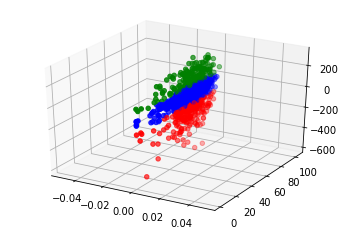

In [48]:
colormap = np.array(['Red', 'Blue', 'Green'])
#plt.scatter_3d(colombia['time_to_death'],colombia['age'], colombia['sex'], c = colormap[kmeans.labels_])

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(colombia['sex'],colombia['age'], colombia['time_to_death'], c=colormap[kmeans.labels_]);

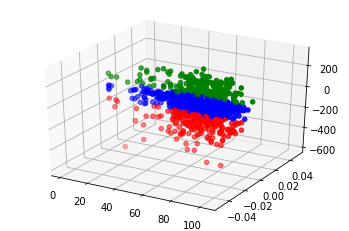

In [52]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(colombia['age'],colombia['sex'], colombia['time_to_death'], c=colormap[kmeans.labels_]);

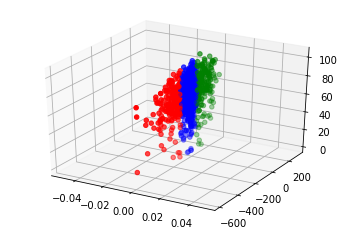

In [53]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(colombia['sex'],colombia['time_to_death'], colombia['age'], c=colormap[kmeans.labels_]);